# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Henrique Fazzio Badin</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta - pode consultar suas anotações, a web, o que quiser, menos perguntar para outros ou para as AIs. Faça o seu trabalho de maneira ética!

ChatGPT para perguntas teóricas não é permitido. CoPilot para código é permitido.

In [24]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


---

**Question 1**

An important skill when studying, testing, and developing new Machine Learning models is the capacity to make test data to explore your understanding of the techniques. In this question you will write functions to make fake datasets to test linear regression.

Look at the example below:

In [31]:
def make_dataset() -> np.array:
    num_points = 100
    num_features = 2
    noise = 0.1

    # Make the features.
    X = np.random.randn(num_points, num_features)

    # Make the target.
    y_real = 1 + 2 * X[:, 0] + 3 * X[:, 1]

    # Add noise.
    y_observed = y_real + np.random.normal(0, noise, num_points)

    return X, y_observed

The functions above work by making a fake set of sample features, and computing a target value according to a linear model plus some noise. Here is an example of use:

In [32]:
X, y = make_dataset()

So, the data generation process above makes $y = 1 + 2 x_1 + 3 x_2 + \text{noise}$

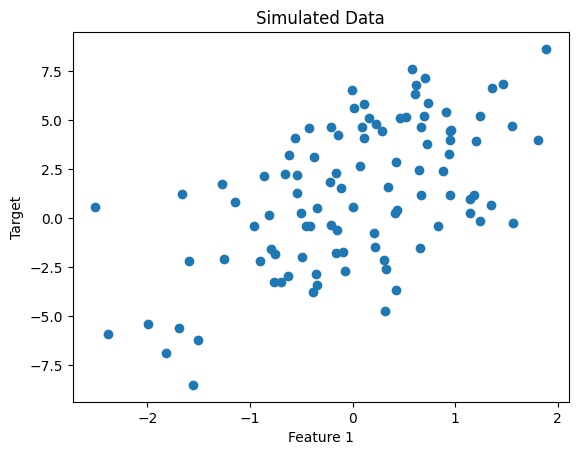

In [33]:
plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()

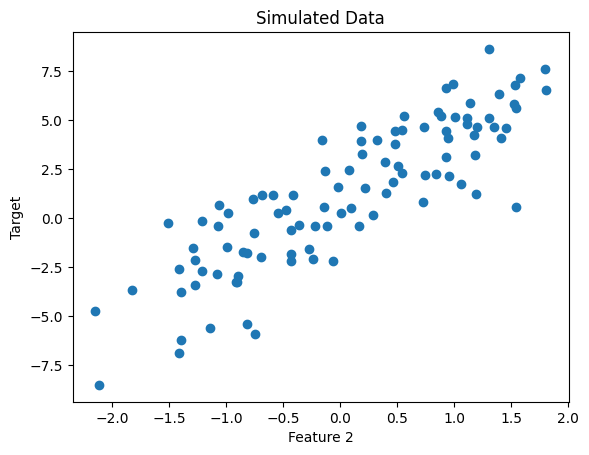

In [34]:
plt.scatter(X[:, 1], y)
plt.xlabel("Feature 2")
plt.ylabel("Target")
plt.title("Simulated Data")
plt.show()

Now, based on the preceding examples, answer the following questions:

(a) (1.0 pts) Split the generated data into train and test datasets. Fit a linear model to the training set and measure the RMSE in the test set.


---

**Answer**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred)
rmse

np.float64(0.11515588767023534)


---

(b) (1.0 pts) Make a new dataset as described:

- Features 1 and 2 are random values, with standard normal distribution. Hint: use `np.random.randn` as in the example
- Feature 3 is $x_3 = 2 x_1 + 3 x_2$
- Target is $y = 4 x_1 + 5 x_2 + 6 x_3$

You can use the `make_dataset` function above as inspiration, of course.


---

**Answer**

In [36]:
def make_new_dataset() -> np.array:
    num_points = 100
    num_features = 3
    noise = 0.1
    X = np.random.randn(num_points, num_features)
    X[:, 2] = 2 * X[:, 0] + 3 * X[:, 1]
    y_real = 4 * X[:, 0] + 5 * X[:, 1] + 6 * X[:, 2]
    y_observed = y_real + np.random.normal(0, noise, num_points)

    return X, y_observed

X, y = make_new_dataset()



---

(c) (1.0 pts) Test two Ridge models to the new dataset: one using $\alpha = 10^{-3}$ and another using $\alpha = 10^{5}$. Explain the difference between the parameters obtained (`model.intercept_`, `model.coefs_`)


---

**Answer**

In [41]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

model = Ridge(alpha=1e-3)

model.fit(X_train, y_train)

print("model Intercept: ", model.intercept_, "model Coeficient: ", model.coef_)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

print("RMSE: ", rmse)

model Intercept:  0.007718588067469057 model Coeficient:  [1.57055277 1.35591088 7.20883816]
RMSE:  0.09044550030026131


In [44]:
model = Ridge(alpha=1e5)

model.fit(X_train, y_train)

print("model Intercept: ", model.intercept_, "model Coeficient: ", model.coef_)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

print("RMSE: ", rmse)

model Intercept:  2.5342502748960904 model Coeficient:  [0.01251217 0.01160953 0.05985292]
RMSE:  28.277229167336923


### Resposta:

alpha = 10^-3 : Os valores dos coeficientes parecem coerentes e o erro mostrado pelo RMSE é muito baixo.

alpha = 10^5 : Coeficientes quase 0, esse alpha não é bom o suficiente para descrever a Data, como podemos ver pelo valor do RMSE que é muito grande.


---

(d) (1.0 pts) Make a new dataset as described:

- Only one feature $x$, made of random values of standard normal distribution.
- But the target is $y = 1 + 2 x + 3 x^2$


---

**Answer**

In [10]:
def make_last_dataset() -> np.array:
    num_points = 100
    num_features = 1
    noise = 0.1
    X = np.random.randn(num_points, num_features)
    y_real = 1 + 2 * X[:, 0] + 3 * (X[:, 0]) ** 2
    y_observed = y_real + np.random.normal(0, noise, num_points)

    return X, y_observed

X, y = make_last_dataset()


---

(e) (1.0 pts) Fit an adequate linear model to the dataset of item (d). 

Hint: you may need `sklearn.preprocessing.PolynomialFeatures`.

Hint 2: you may need a `sklearn.pipeline.Pipeline`: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html#displaying-a-pipeline-chaining-multiple-preprocessing-steps-classifier

Hint 3: If using `PolynomialFeatures`, don't forget to use the argument `include_bias=False`


---

**Answer**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly = PolynomialFeatures(degree=2, include_bias=False)
steps = [
    ("standard_scaler", StandardScaler()),
    ("polynomial", poly),
    ("classifier", LinearRegression()),
]
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
rmse

np.float64(0.07877070422746424)


---

**Question 2**

The following function simulates a dataset $X$ of customers versus products, and the value in $X_{i,j}$ means the number of items of product $j$ purchased by customer $i$. Ignore its internal workings.

In [13]:
def make_dataset():
    np.random.seed(42)

    num_customers = 1000
    num_purchases = 300

    pc = np.array([1, 1, 1, 1, 1])
    pc = np.exp(pc)
    pc = pc / np.sum(pc)

    p = np.array([
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
    ])
    p = np.exp(0.7*p)
    p = p / np.sum(p, axis=1)[:, np.newaxis]

    C = np.random.choice(len(pc), size=(num_customers, 1), p=pc)

    Pk = []
    for k in range(p.shape[0]):
        Pki = []
        for i in range(p.shape[1]):
            Pki.append(
                np.random.binomial(
                    n=num_purchases,
                    p=p[k, i],
                    size=(num_customers, 1),
                ))
        Pk.append(np.hstack(Pki))

    P = np.zeros((num_customers, p.shape[1]))
    for k in range(p.shape[0]):
        P += Pk[k] * (C == k)

    df = pd.DataFrame(P, columns=[f'product_{k+1}' for k in range(p.shape[1])])
    return df
    
X = make_dataset()

In [14]:
X

,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9
0,33.0,26.0,28.0,40.0,34.0,55.0,27.0,31.0,23.0
1,34.0,31.0,26.0,42.0,24.0,33.0,21.0,28.0,59.0
2,24.0,31.0,32.0,29.0,24.0,27.0,34.0,58.0,28.0
3,35.0,31.0,31.0,36.0,36.0,33.0,59.0,32.0,35.0
4,34.0,27.0,31.0,25.0,62.0,23.0,28.0,33.0,28.0
...,...,...,...,...,...,...,...,...,...
995,32.0,36.0,29.0,37.0,55.0,33.0,40.0,28.0,29.0
996,34.0,31.0,23.0,22.0,26.0,26.0,29.0,21.0,73.0
997,22.0,27.0,28.0,28.0,52.0,26.0,26.0,29.0,33.0
998,34.0,25.0,33.0,23.0,27.0,28.0,33.0,33.0,69.0


So we have $1000$ customers and $9$ products.


---

(a) (1.0 pts) For each number of clusters from 2 to 10, perform a KMeans clustering on the dataset $X$ and compute the silhouette score


---

**Answer**

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    print(f"Silhouette score for {n_clusters} clusters: {silhouette_score(X, kmeans.labels_)}")

Silhouette score for 2 clusters: 0.202938651868109
Silhouette score for 3 clusters: 0.28694791482325205
Silhouette score for 4 clusters: 0.3884500790978319
Silhouette score for 5 clusters: 0.4992820372663658
Silhouette score for 6 clusters: 0.41121024932387185
Silhouette score for 7 clusters: 0.33713382138311054
Silhouette score for 8 clusters: 0.3090232528777472
Silhouette score for 9 clusters: 0.3052871728850494
Silhouette score for 10 clusters: 0.30371213236951106



---

(b) (1.0 pts) Now lets normalize $X$ and compute its SVD:

In [16]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

U, s, Vt = np.linalg.svd(X_norm, full_matrices=False)

We will also multiply $U$ by the singular values, to account for the heightened importance of the first columns of $U$:

In [17]:
U = U * s
U.shape

(1000, 9)

Compute the KMeans clustering of $U$ and calculate the silhouette score for the number of clusters changing from 2 to 10, and the number of columns of $U$ varying from 2 to `U.shape[1]`. Find the best combination of number of columns and clusters.


---

**Answer**

In [18]:
silhouette_score_dictionary = {}

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    for i in range(2, U.shape[1] + 1):
        info_list = []
        Uc = U[:, :i]
        kmeans.fit(Uc)
        info_list.append((n_clusters, silhouette_score(Uc, kmeans.labels_)))
        silhouette_score_dictionary[(i, n_clusters)] = silhouette_score(Uc, kmeans.labels_)

print("The best number of clusters is", max(silhouette_score_dictionary, key=silhouette_score_dictionary.get), "with a silhouette score of", silhouette_score_dictionary[max(silhouette_score_dictionary, key=silhouette_score_dictionary.get)])
#print(silhouette_score_dictionary)

The best number of clusters is (4, 5) with a silhouette score of 0.5671302682408222



---

**Question 3** (3.0 pts)

Here is a list of topics in Machine Learning:

- Train-test split
- Gradient descent
- Feature engineering
- Ridge regularization
- Linear dependence
- Impact of Machine Learning to society

And here is a list of personas:

- A 12-year old teenager with good attention span and that knows basic arithmetic
- An economist
- An engineer of your favorite persuasion
- Your favorite family member
- A social studies professor

Choose two personas and two topics, match persona-topic, and write in your own words an explanation of that topic to that persona.

You will be judged on:

- How correct is the explanation
- How adequate is the exposition to the audience.
    - The explanation must be at an adequate level, both in content and terminology, for the persona
    - The explanation must be engaging to the persona. For instance: choose examples that may pique the person's curiosity

In case you choose your family member, explain which family member and how this person's knowledge relates to your explanation (e.g. "you are the golden child of Yoshua Bengio himself" vs "your beloved family member is your stoner drop-out cousin")


---

**Answer 1**

Persona: My favorite family member, my cousin who is a lawyer and doesn't know anything about Coding, Machine learning or Dataset.

Topic: Train-test split

Explanation: Quando estamos procurando criar um modelo de previsão em Machine Learning, recolhemos uma grande quantidade de dados para treiná-lo. Após analisarmos e podarmos os dados, realizaremos a criação do modelo. Nosso modelo é preditivo, ou seja, ele utiliza os dados relativos a uma certa quantidade de features, variáveis que analisamos como possíveis descritoras de uma variável alvo, e quais as correspondências entre essas features e a variável alvo. Ou seja, de forma simples, ele analisa quais foram os resultados de uma determinada varíavel para certos valores de outras. Dessa forma, para que seja possível testar a acurácia do modelo, optamos por dividir os dados em dois grupos, sendo um deles os dados que serão utilizados para treino, e o outro para teste. Com isso feito, treinamos o nosso modelo com os dados de teste, utilizamos o nosso modelo recentemente treinado para prever os resultados da variável alvo com os dados de teste, e comparamos os resultados obtidos com os resultados reais. Dessa forma, conseguimos medir a acurácia do nosso modelo, e verificar se ele é capaz de prever corretamente os resultados da variável alvo.


---

**Answer 2**

Persona: A 12 year old teenager with good attention span and that knows basic arithmetic

Topic: Impact of Machine Learning to society

Explanation: Machine Learning é um tópico muito interessante. A utilidade e importancia dele é muito alta, já que essa área estuda como fazer computadores realizarem previsões baseadas em um número imenso de informações. Nós humanos conseguimos observar padrões com relativa facilidade quando nós estamos lidando com uma tabela pequena. Por exemplo, uma tabela onde uma coluna possui números que são incrementados de um em um a cada linha e a outra coluna possui números que são incrementados de dois em dois e ambas as colunas começam do número 0. Conseguimos facilmente perceber a relação entre as duas colunas, uma é o dobro da outra. Mas se tivermos uma tabela com 1000 linhas e 1000 colunas e quisermos encontrar um padrão entre elas, isso se torna muito mais difícil. Porém, com Machine Learning, conseguimos fazer com que um computador encontre esses padrões para nós. Isso é muito útil, pois podemos utilizar esses padrões para prever acontecimentos que ainda virão a ocorrer, como por quanto uma casa será vendida a partir de características em comum dela com outras milhares de outras casas que já foram vendidas, ou prevení-los, como evitar que uma pessoas abandone a sua futura empresa analisando as opiniões dela sobre o ambiente de trabalho comparado ao de pessoas que eventualmente vieram a sair. Isso é muito importante para a sociedade, pois nos ajuda a tomar decisões melhores, mais rápidas e mais prováveis, evitando muito trabalho e gasto desnecessário.